In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Recharger le CSV après reset
df = pd.read_csv('coverage_urban_rural_total_long.csv')


In [10]:
# Aperçu
print("Aperçu des premières lignes :")
print(df.head(), "\n")

Aperçu des premières lignes :
                region  year  coverage area_type
0                World  2021      61.7     Total
1           Low-income  2021      20.9     Total
2  Lower-middle-income  2021      46.6     Total
3  Upper-middle-income  2021      74.1     Total
4          High-income  2021      90.0     Total 



In [11]:
print("Informations générales :")
df.info()
print()

Informations générales :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   region     168 non-null    object 
 1   year       168 non-null    int64  
 2   coverage   168 non-null    float64
 3   area_type  168 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 5.4+ KB



### Aperçu (head) et informations (info)
montrent 168 observations sans valeurs manquantes et 4 colonnes (region, year, coverage, area_type).

In [12]:
print("Statistiques descriptives :")
print(df.describe(), "\n")

Statistiques descriptives :
              year    coverage
count   168.000000  168.000000
mean   2022.500000   61.882143
std       1.121376   23.523830
min    2021.000000   12.500000
25%    2021.750000   42.875000
50%    2022.500000   65.350000
75%    2023.250000   82.975000
max    2024.000000   94.900000 



### Interprétation analyse descriptive :
On ne remarque pas d'anomalies à première vue
- les années vont bien de 2021 à 2024
- toutes les couvertures sont bien entre 0 % et 100 %

In [13]:
print("Valeurs manquantes par colonne :")
print(df.isna().sum(), "\n")

Valeurs manquantes par colonne :
region       0
year         0
coverage     0
area_type    0
dtype: int64 



### Aucune valeur manquante détéctée

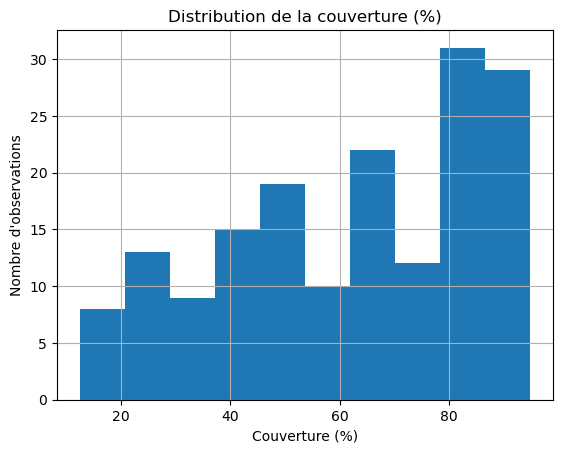

In [14]:
# Histogramme de la distribution de 'coverage'
plt.figure()
df['coverage'].hist()
plt.title('Distribution de la couverture (%)')
plt.xlabel('Couverture (%)')
plt.ylabel('Nombre d\'observations')
plt.show()

<Figure size 640x480 with 0 Axes>

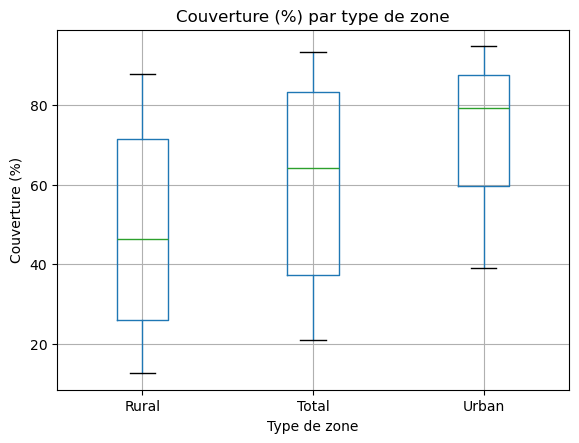

In [15]:
# Boxplot de 'coverage' par 'area_type'
plt.figure()
df.boxplot(column='coverage', by='area_type')
plt.title('Couverture (%) par type de zone')
plt.suptitle('')
plt.xlabel('Type de zone')
plt.ylabel('Couverture (%)')
plt.show()

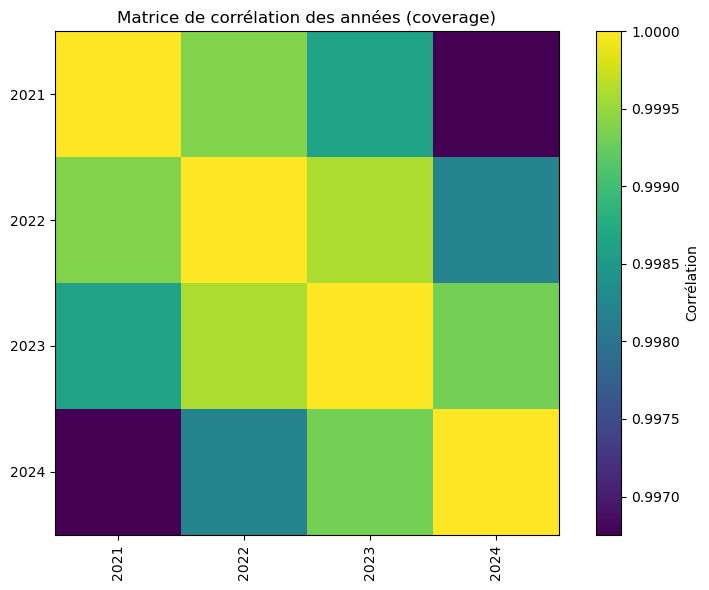

In [16]:
# Heatmap des corrélations entre coverage des différentes années
pivot = df.pivot_table(index=['region', 'area_type'], columns='year', values='coverage')
corr = pivot.corr()

plt.figure(figsize=(8, 6))
plt.imshow(corr)
plt.title('Matrice de corrélation des années (coverage)')
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.index)), corr.index)
plt.colorbar(label='Corrélation')
plt.tight_layout()
plt.show()